In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [119]:
# how to use science style - https://github.com/garrettj403/SciencePlots
try:
    plt.style.use(['science','grid', 'no-latex'])
except:
    pass

In [68]:
df = pd.read_excel('./results/wofost.xlsx')
df = df.set_index('Weather')

In [69]:
df = df.round(0)

In [34]:
sns.set_context('talk')

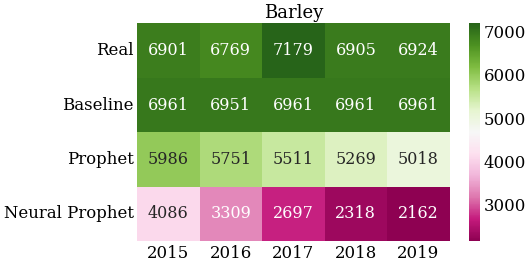

In [118]:
crop = 'barley'
mask = df['Crop'] == crop
fig, ax1 = plt.subplots(1,1, figsize=(7,4))

sns.heatmap(df.loc[mask, range(2015,2020)],cmap='PiYG',
            annot=True,
            fmt='g', 
           annot_kws={"fontsize":16})

ax1.set_ylabel('')
ax1.set_title(crop.capitalize())
plt.savefig(f'./plots/wofost_{crop}.png', dpi=150)

## 2. KDEplots

In [42]:
df = pd.DataFrame()
for file in os.listdir('./interval_yield/'):
    if 'csv' in file:
        _df = pd.read_csv(os.path.join('./interval_yield/',  file))
        df = pd.concat([df, _df])

In [53]:
df = df.round(0)
year = 2015
mask = (df['crop'] == crop) & (df['year']==year)

In [54]:
select = df.loc[mask]

In [56]:
array_yield = select['WOFOST_FLD'].values

Text(0.5, 1.0, 'Soybean 2015')

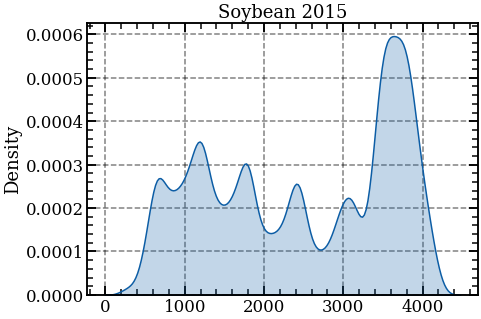

In [63]:
fig, ax1 = plt.subplots(1,1, figsize=(7,5))

sns.kdeplot(x=array_yield, ax=ax1, fill=True)
ax1.set_title(crop.capitalize() + f' {year}')

## 3. Plot weather

In [84]:
weatherPh = pd.read_csv('predicted_weather/prophet.csv')
weatherReal = pd.read_csv('predicted_weather/real.csv')

In [85]:
weatherPh['DAY'] = pd.to_datetime(weatherPh['DAY'], format='%Y%m%d')
weatherReal['DAY'] = pd.to_datetime(weatherReal['DAY'], format='%Y%m%d')

In [105]:
weatherPh.set_index('DAY')[['IRRAD', 'RAIN']].groupby(pd.Grouper(freq='Y')).sum().round(1)

,IRRAD,RAIN
DAY,,
2015-12-31,4482438.2,529.4
2016-12-31,4476948.2,509.0
2017-12-31,4466579.7,486.2
2018-12-31,4458965.2,464.6
2019-12-31,4451129.4,443.1


In [104]:
weatherReal.set_index('DAY')[['IRRAD', 'RAIN']].groupby(pd.Grouper(freq='Y')).sum()

,IRRAD,RAIN
DAY,,
2015-12-31,4508670.0,573.01
2016-12-31,4157790.0,940.25
2017-12-31,4352610.0,652.55
2018-12-31,4759730.0,637.48
2019-12-31,4540120.0,608.24


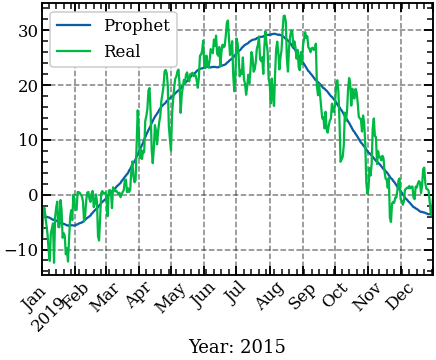

In [117]:
fig, ax1 = plt.subplots(1,1, figsize=(7,5))
weatherPh.set_index('DAY')[-365:]['TMAX'].plot(ax=ax1, label='Prophet')
weatherReal.set_index('DAY')[-365:]['TMAX'].plot(ax=ax1, label='Real')
ax1.legend()
# ax1.set_xticks(rotation=45)

# ax1.set_xticks(ax1.get_xticks())
# ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_xlabel(f'Year: {year}')
plt.xticks(rotation=45)
plt.show()